## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

In [123]:
# Use this cell to begin your analysis, and add as many as you would like!
import pandas as pd 
import numpy as np


In [124]:
# load dataset
series = pd.read_csv('datasets/office_episodes.csv')

#Preview head
series.head(10)

,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.20,23,2005-03-24,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,False,0.28125
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.00,23,2005-03-29,NaN,Ken Kwapis,B. J. Novak,False,0.53125
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.80,22,2005-04-05,NaN,Ken Whittingham,Paul Lieberstein,False,0.37500
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.40,23,2005-04-12,NaN,Bryan Gordon,Michael Schur,False,0.46875
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.00,23,2005-04-19,NaN,Greg Daniels,Greg Daniels,False,0.56250
5,5,1,Hot Girl,Michael is just one of the many male staff who...,7.7,3854,4.80,23,2005-04-26,Amy Adams,Amy Heckerling,Mindy Kaling,True,0.34375
6,6,2,The Dundies,"Very much unlike his staff, an overeager Micha...",8.7,4315,9.00,21,2005-09-20,NaN,Greg Daniels,Mindy Kaling,False,0.65625
7,7,2,Sexual Harassment,The office reviews its sexual harassment polic...,8.2,3665,7.13,22,2005-09-27,NaN,Ken Kwapis,B. J. Novak,False,0.50000
8,8,2,Office Olympics,"Ready to finalize his deal for a new condo, Mi...",8.4,3665,8.30,22,2005-10-04,Nancy Carell,Paul Feig,Michael Schur,True,0.56250
9,9,2,The Fire,A fire in the kitchen relegates the staff to t...,8.4,3607,7.60,22,2005-10-11,Amy Adams,Ken Kwapis,B. J. Novak,True,0.56250


In [125]:
import matplotlib.pyplot as plt

# sizing system
sizes = []
for guest in series.has_guests:
    if guest == True:
        sizes.append(250)
    else:
        sizes.append(25)

# colors in plot
cols = []
for ind,row in series.iterrows():
    if row['scaled_ratings'] < 0.25:
        cols.append('red')
    elif row['scaled_ratings'] < 0.5:
        cols.append('orange')
    elif row['scaled_ratings'] < 0.75:
        cols.append('lightgreen')
    else: 
        cols.append('darkgreen')


In [126]:
# For ease of plotting, add our lists as columns to the DataFrame
series['colors'] = cols
series['sizes'] = sizes

# Subset guests and non-guests
guests_df = series[series['has_guests'] == True]
non_guests_df = series[series['has_guests'] == False]

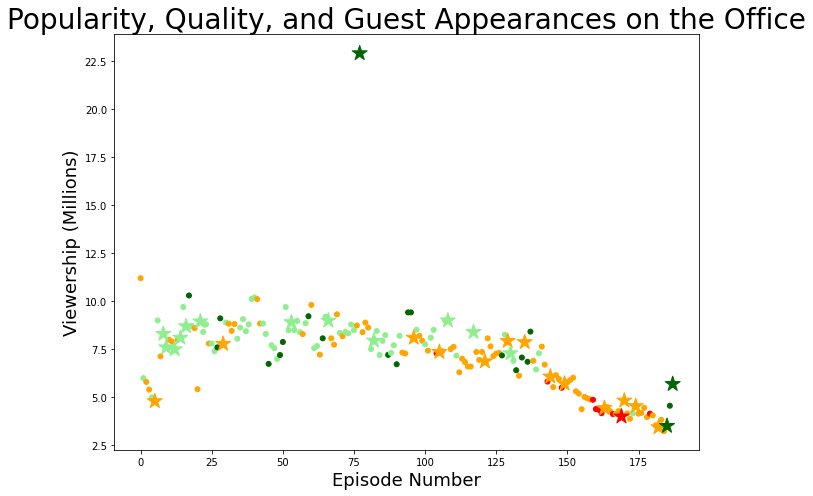

In [127]:
plt.rcParams['figure.figsize'] = [11, 7]

fig = plt.figure()

# Scatterplot of episode number and viewership
plt.scatter(data= non_guests_df, x='episode_number', y='viewership_mil',\
            c=non_guests_df['colors'], s=non_guests_df['sizes'])

plt.scatter(data= guests_df, x='episode_number', y='viewership_mil',\
            c=guests_df['colors'], s=guests_df['sizes'], marker='*')

# Create a title
plt.title("Popularity, Quality, and Guest Appearances on the Office", fontsize=28)

# Create an x-axis label
plt.xlabel("Episode Number", fontsize=18)

# Create a y-axis label
plt.ylabel("Viewership (Millions)", fontsize=18)

# Show the plot
plt.show()

In [128]:
# Subset episodes with guest stars
guest_present = series.loc[series['has_guests'] == True]

# Print guest stars in most watched episodes
print(guest_present[['guest_stars','viewership_mil']].sort_values('viewership_mil', ascending=False))

                                           guest_stars  viewership_mil
77           Cloris Leachman, Jack Black, Jessica Alba           22.91
108                                      Mellisa Rauch            9.00
66                                Wendi McLendon-Covey            8.99
21                                       Conan O'Brien            8.95
53                                        Kevin McHale            8.91
16                                          Rob Riggle            8.70
117                                        Evan Peters            8.40
8                                         Nancy Carell            8.30
14                                           Ken Jeong            8.10
96                                          Mike Starr            8.10
82                                          Idris Elba            7.95
129                                      Ricky Gervais            7.93
135                                       Will Ferrell            7.87
29    

In [129]:
top_star = 'Jessica Alba'